<a href="https://colab.research.google.com/github/Anthonyvol/abstract_dog/blob/issue-1/Copy_of_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#from google.colab.patches import cv2_imshow

In [3]:
'''
It cleans img from noise
'''
def clear_img(file_name):
    img = cv2.imread(file_name, 0)

    dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(img, bg_img)
    norm_img = diff_img.copy()
    cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    _, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
    cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    thr_img[thr_img < 240] = 0
    cv2.imwrite("c_" + file_name, thr_img)

'''
It resizes image
'''
def resize_img(img, scale):
    return cv2.resize(img,(img.shape[1] * scale, img.shape[0] * scale))

'''
Finding edges 
'''
def define_edged(img, min, max):
    return cv2.Canny(img, min, max)

'''
Finding contours
'''
def get_contours(edged):
    return cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

In [5]:
clear_img("3.jpg")

img = cv2.imread('c_3.jpg')

cv2.imshow(img), plt.show()
cv2.imsave('big.jpg', resize_img(img, 3))

error: OpenCV(4.1.1) /io/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


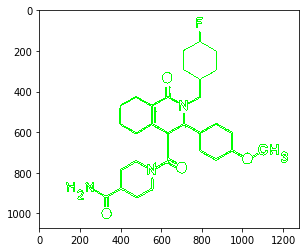

In [6]:
image = cv2.imread('3.jpg')

edged = define_edged(image, 30, 200)
contours, hierarchy = get_contours(edged)

image[::] = 255
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

plt.imshow(image)
plt.show()

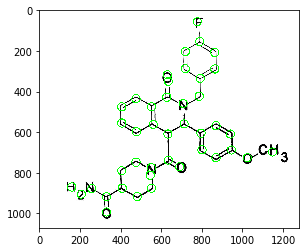

In [56]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from math import sqrt


img = cv2.imread('3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 30, 3, 0.04)
ret, dst = cv2.threshold(dst, 0.1*dst.max(), 255, 0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), criteria)


#for i in range(1, len(corners)):
    #print(corners[i])
#img[dst>0.1*dst.max()]=[0,0,255]


for i in range(1, len(corners)):
    #print(corners[1])
    #distanse = sqrt((corners[i, 0] - corners[i-1, 0])**2 + (corners[i, 1] - corners[i-1, 1])**2)
    #if distanse > 70.0:
    cv2.circle(img, (int(corners[i, 0]), int(corners[i, 1])), 20, (0,255,0), 3)
plt.imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows

In [57]:
data_of_noda = {}
index = 0

def find_bondes(corners):
    for i in range(1, len(corners)):
        

for i in range(1, len(corners)):
    data_of_noda[index] =

array([332.07584, 992.33307], dtype=float32)

In [102]:
img2 = cv2.imread('3.jpg')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 200)

lines = cv2.HoughLines(edges, 10, np.pi/180, 200)

for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 100 * (-b))
        y1 = int(y0 + 100 * (a))
        x2 = int(x0 - 100 * (-b))
        y2 = int(y0 - 100 * (a))
        cv2.line(img2,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img2)

True

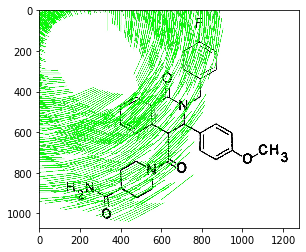

In [103]:
img3 = cv2.imread('houghlines5.jpg')

plt.imshow(img3)